# Data Description
* **Pregnancies**: To express the Number of pregnancies
* **Glucose**: To express the Glucose level in blood
* **BloodPressure**: To express the Blood pressure measurement
*  **SkinThickness**: To express the thickness of the skin
*  **Insulin**:  To express the Insulin level in blood
*  **BMI**:  To express the Body mass index
*  **DiabetesPedigreeFunction**:  To express the Diabetes percentage
*  **Age**:  To express the age
*  **Outcome**:  To express the final result 1 is Yes and 0 is No

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot,iplot

In [5]:
data = pd.read_csv("diabetes.csv")

In [6]:
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
def Range(x):
    print(f"{x} Range: [{data[x].min()} - {data[x].max()}]",end='\n' + '*'*50+'\n')

data.columns.map(Range)
_ = 10

Pregnancies Range: [0 - 17]
**************************************************
Glucose Range: [0 - 199]
**************************************************
BloodPressure Range: [0 - 122]
**************************************************
SkinThickness Range: [0 - 99]
**************************************************
Insulin Range: [0 - 846]
**************************************************
BMI Range: [0.0 - 67.1]
**************************************************
DiabetesPedigreeFunction Range: [0.078 - 2.42]
**************************************************
Age Range: [21 - 81]
**************************************************
Outcome Range: [0 - 1]
**************************************************


In [10]:
data[data.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [11]:
data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(to_replace=0,value=np.nan)

In [12]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
!pip install missingno

In [14]:
#library used in visualizing missing values
import missingno as msno 

<Axes: >

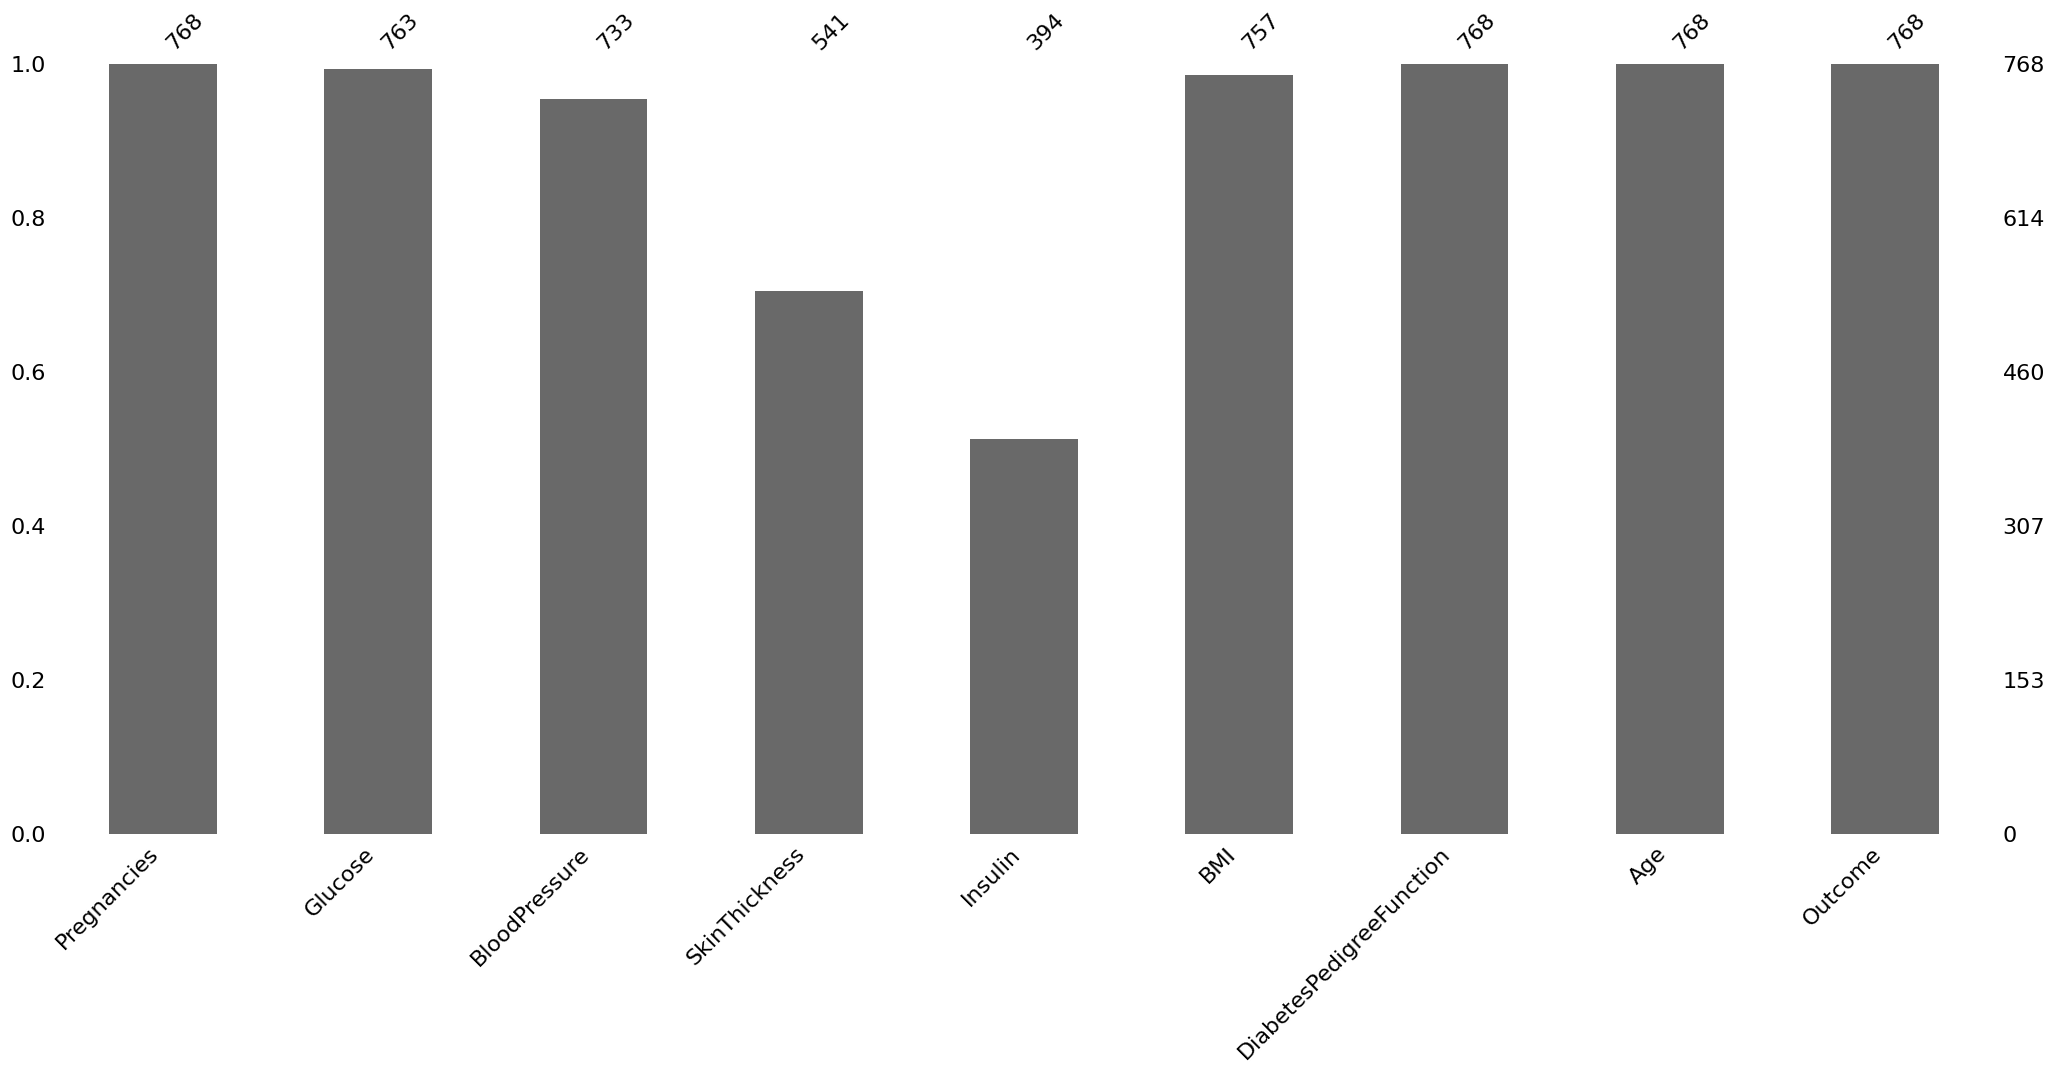

In [15]:
msno.bar(data)

<Axes: >

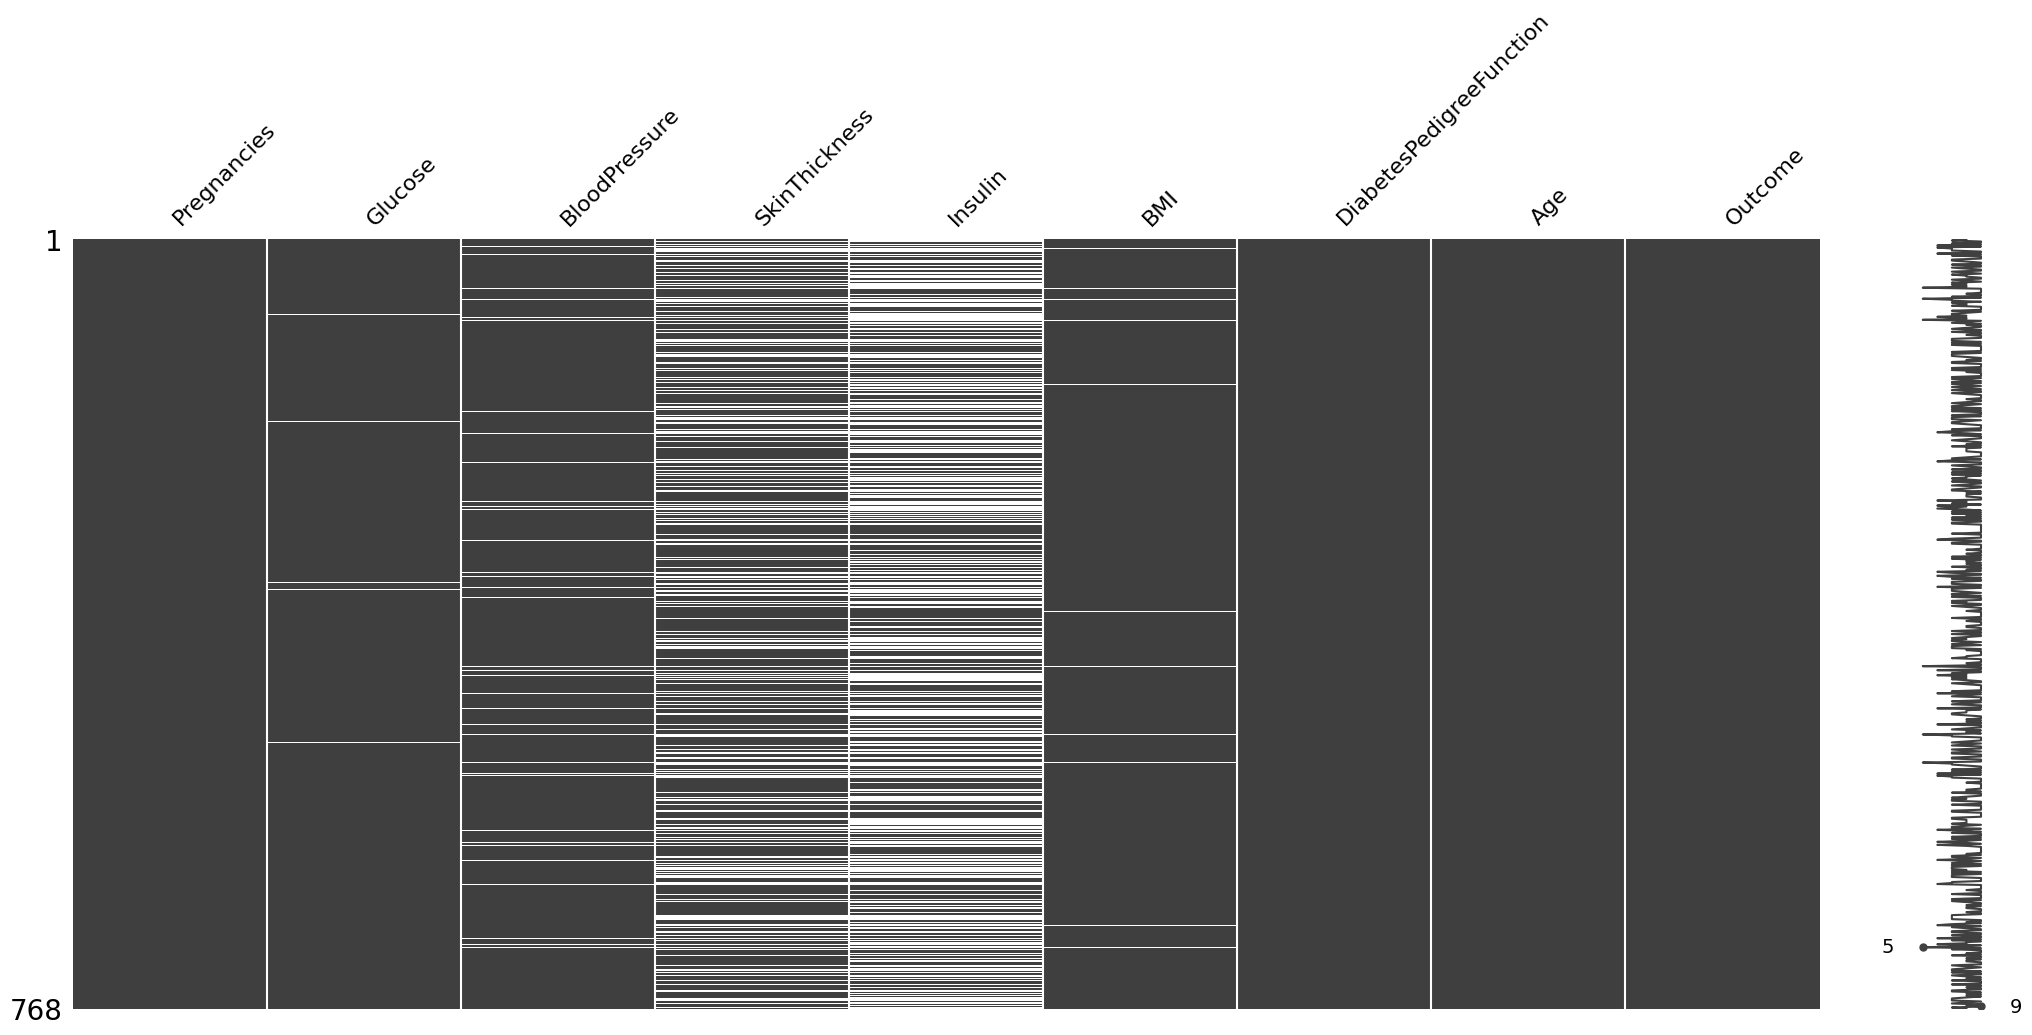

In [16]:
msno.matrix(data)

<Axes: >

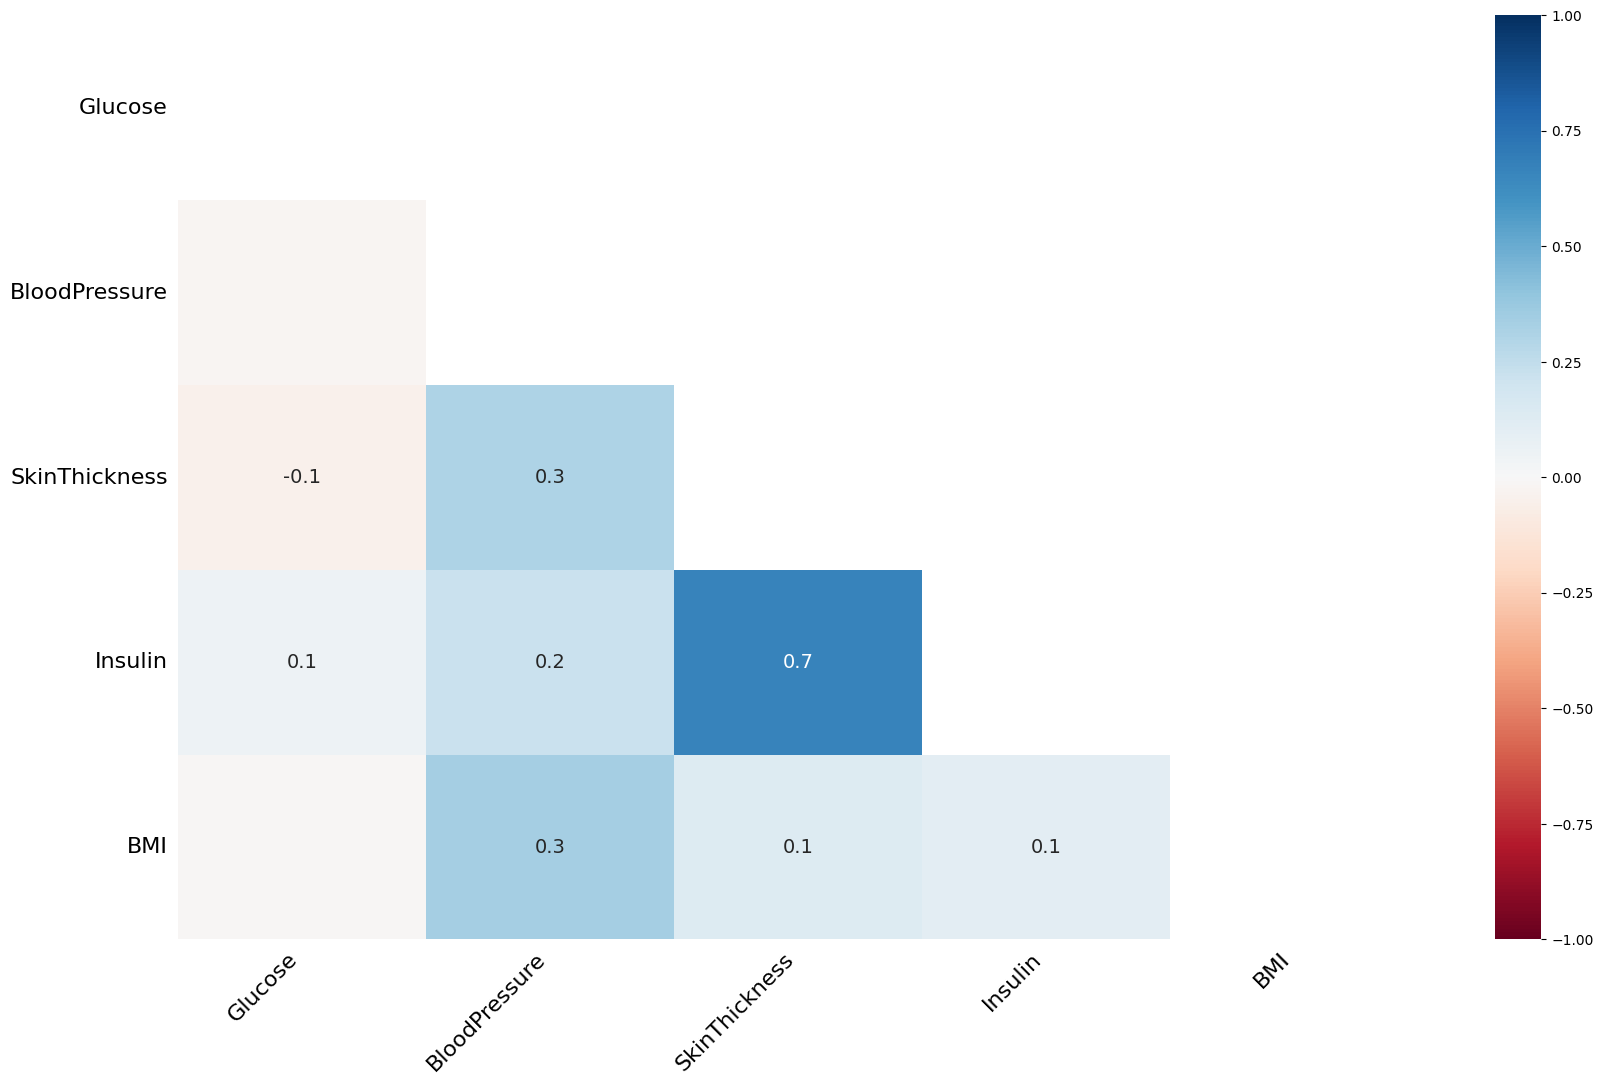

In [17]:
msno.heatmap(data)

In [18]:
# function which takes a feature name then replace the nans with the median of the specified feature
def handle(f):
    mid = data[f].median(axis=0,skipna=True)
    data[f].fillna(mid,inplace=True)

In [19]:
# storing features which contains missing values in a list
mis = [f for f in data.columns if data[f].hasnans]
mis

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [20]:
fun = lambda x : [handle(a) for a in x] 

In [45]:
from warnings import filterwarnings 
filterwarnings("ignore")

In [46]:
# _=10 is a redundant line to prevent printing none
fun(mis)
_ = 10

In [22]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
#detecting outliers
l = []
for f in data.columns:
    q1 = data[f].quantile(0.05)
    q3 = data[f].quantile(0.95)
    iqr = q3 - q1
    if (q1 - 1.5 * iqr) > data[f].min() or (q3 + 1.5 * iqr) < data[f].max():
        print(f"{f} has outliers")
        l.append(f)
    else:
        print(f"{f} doesn't have outliers")


Pregnancies doesn't have outliers
Glucose doesn't have outliers
BloodPressure doesn't have outliers
SkinThickness has outliers
Insulin has outliers
BMI doesn't have outliers
DiabetesPedigreeFunction doesn't have outliers
Age doesn't have outliers
Outcome doesn't have outliers


In [24]:
#removing the outliers 
for f in l:
    q1 = data[f].quantile(0.05)
    q3 = data[f].quantile(0.95)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    data = data[~((lower_fence > data[f]) | (upper_fence < data[f]))]

In [25]:
data.shape

(764, 9)

In [26]:
data.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       758, 759, 760, 761, 762, 763, 764, 765, 766, 767],
      dtype='int64', length=764)

In [27]:
for f in l:
    q1 = data[f].quantile(0.05)
    q3 = data[f].quantile(0.95)
    iqr = q3 - q1
    if (q1 - 1.5 * iqr) > data[f].min() or (q3 + 1.5 * iqr) < data[f].max():
        print(f"{f} has outliers")
        l.append(f)
    else:
        print(f"{f} doesn't have outliers")

SkinThickness doesn't have outliers
Insulin doesn't have outliers


In [28]:
data.reset_index(drop=True,inplace=True)

In [29]:
df = data.copy()

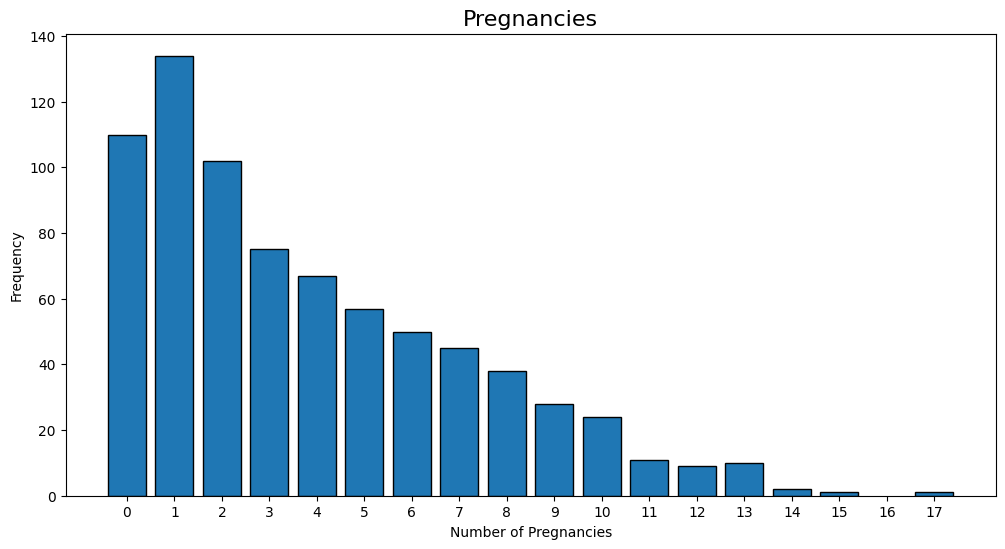

In [30]:
plt.figure(figsize=(12,6))
plt.title("Pregnancies",fontsize=16)
plt.bar(x=df["Pregnancies"].value_counts().index,height=df["Pregnancies"].value_counts(),edgecolor='black')
plt.xlabel("Number of Pregnancies")
plt.ylabel("Frequency")
plt.xticks(np.arange(0,18))
plt.show()

In [31]:
r = df.columns[1:-1].to_list()

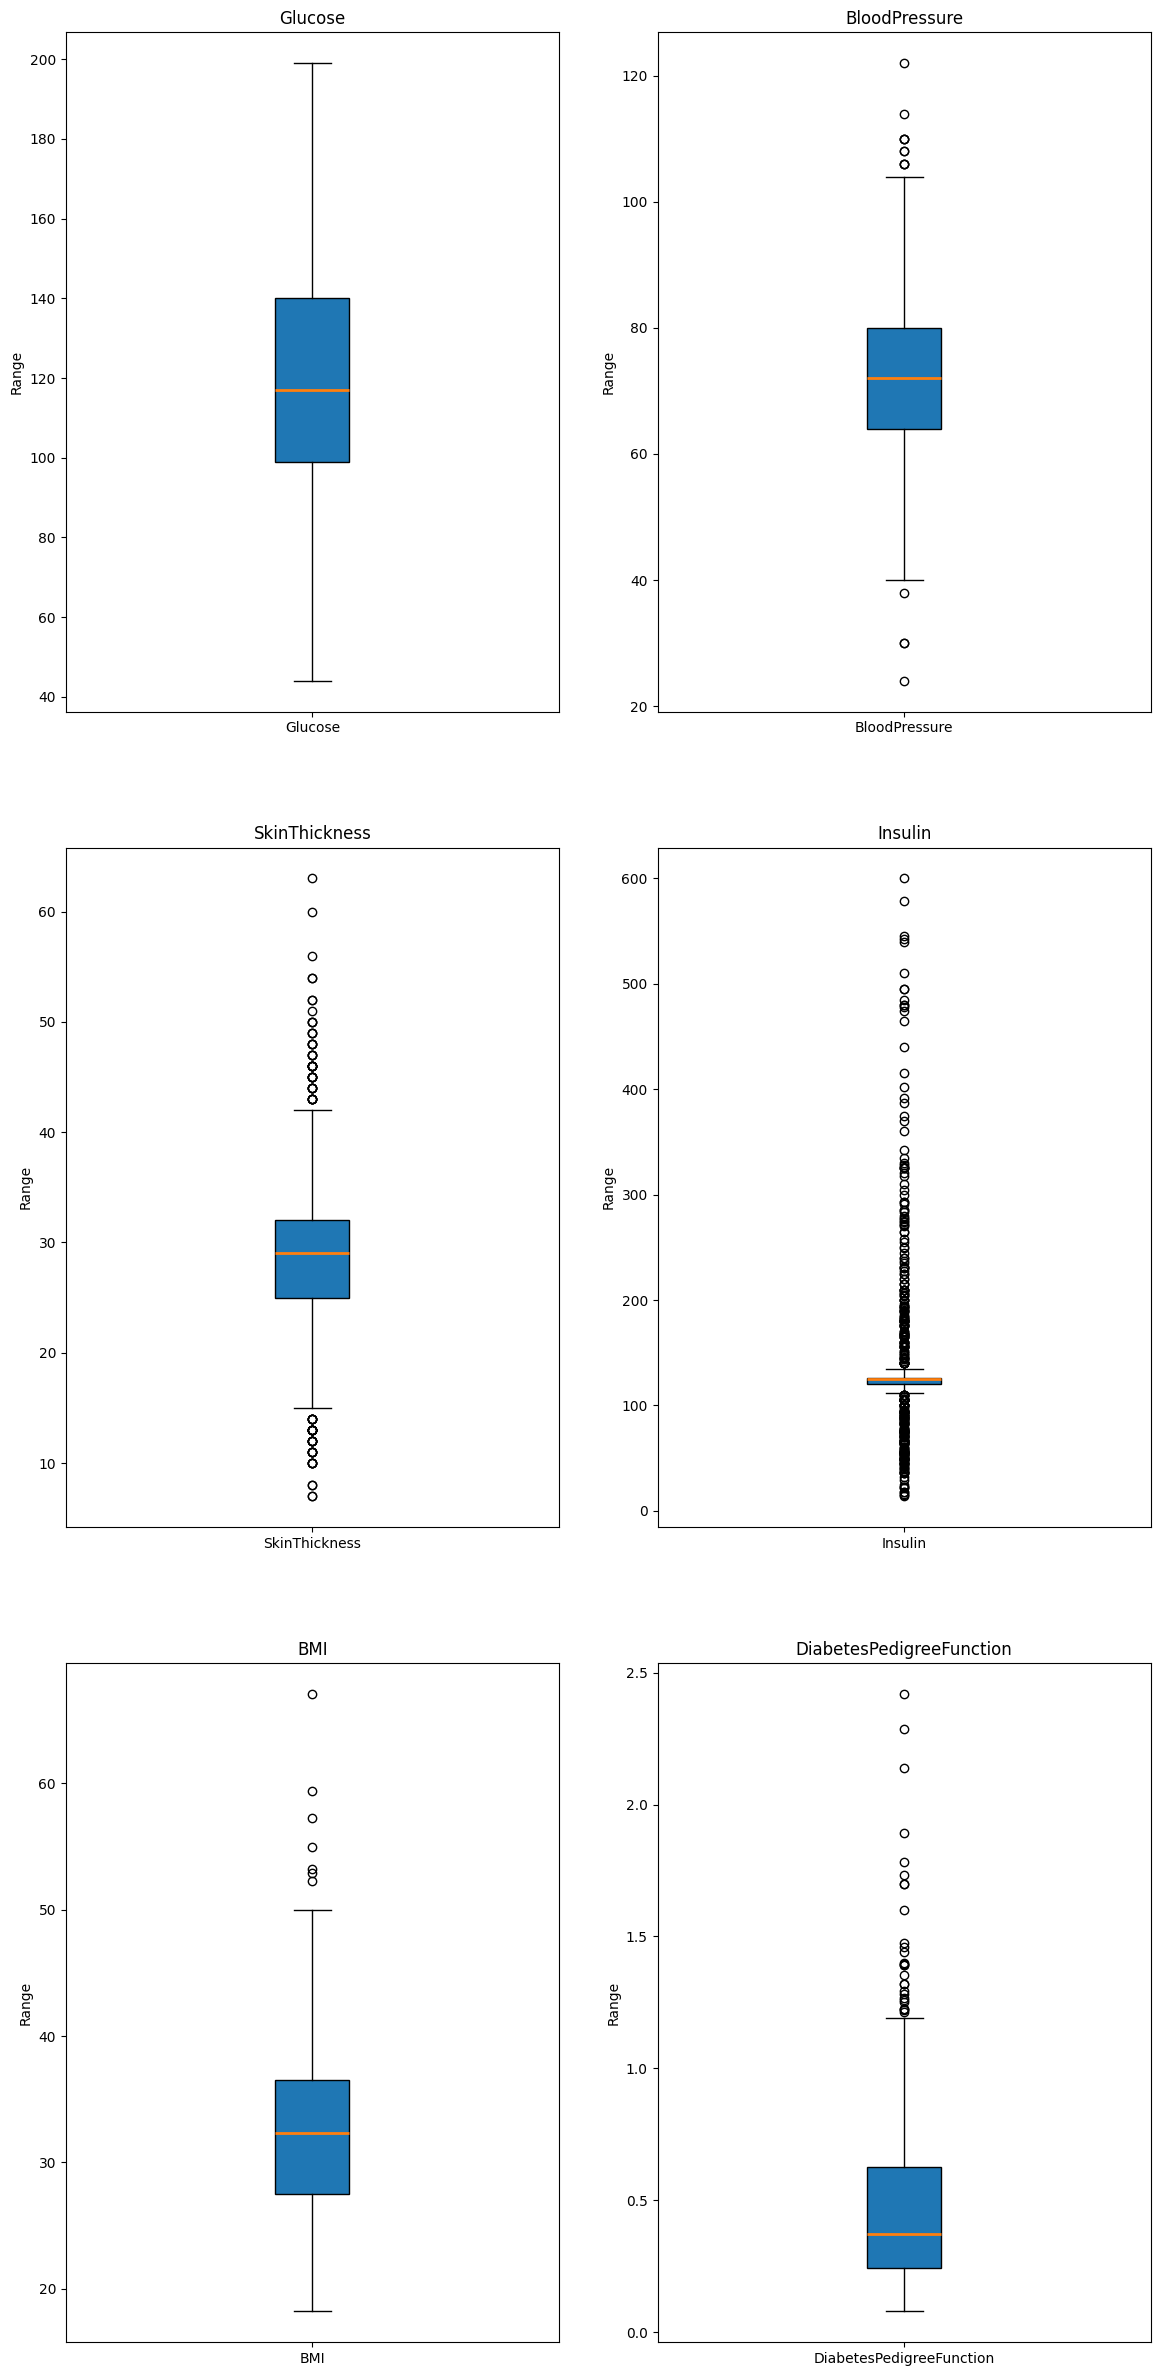

In [32]:
n_rows = 3
n_cols = 2
fig,ax = plt.subplots(n_rows,n_cols,figsize=(14,30))
k = 0
for i in range(n_rows):
    j = 0
    ax[i,j].boxplot(df[r[k]],patch_artist=True,medianprops={"linewidth":2})
    ax[i,j].set_title(r[k])
    ax[i,j].set_xticks(ticks=[1],labels = [r[k]])
    ax[i,j].set_ylabel("Range")
    j += 1
    k+= 1
    ax[i,j].boxplot(df[r[k]],patch_artist=True,medianprops={"linewidth":2})
    ax[i,j].set_title(r[k])
    ax[i,j].set_xticks(ticks=[1],labels = [r[k]])
    ax[i,j].set_ylabel("Range")
    k+= 1
plt.show()

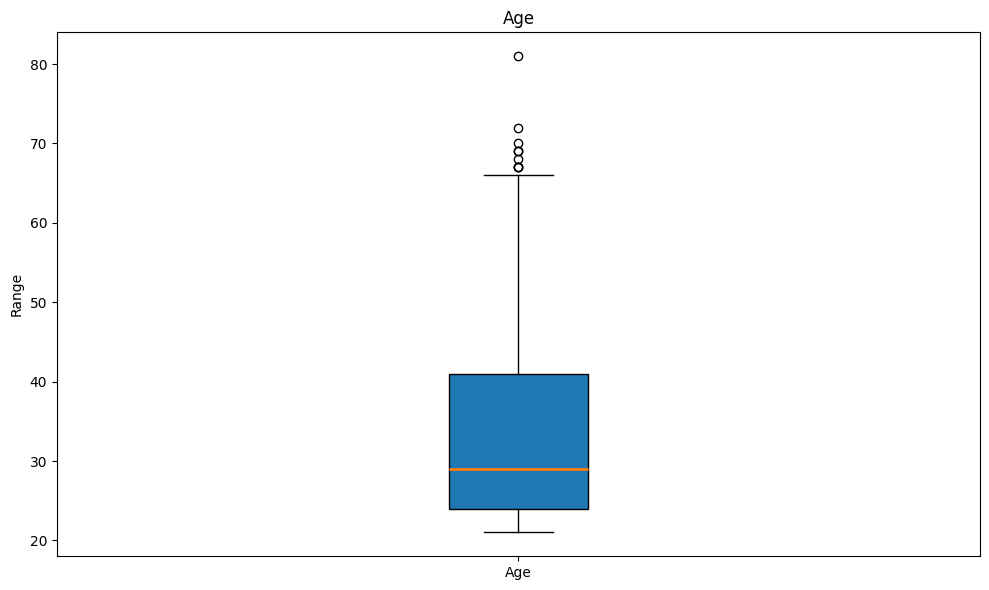

In [33]:
plt.figure(figsize=(10,6))
plt.title(r[-1])
plt.boxplot(df[r[-1]],patch_artist=True,medianprops={"linewidth":2})
plt.xticks([1],labels=[r[-1]])
plt.ylabel("Range")
plt.tight_layout()
plt.show()

<Axes: >

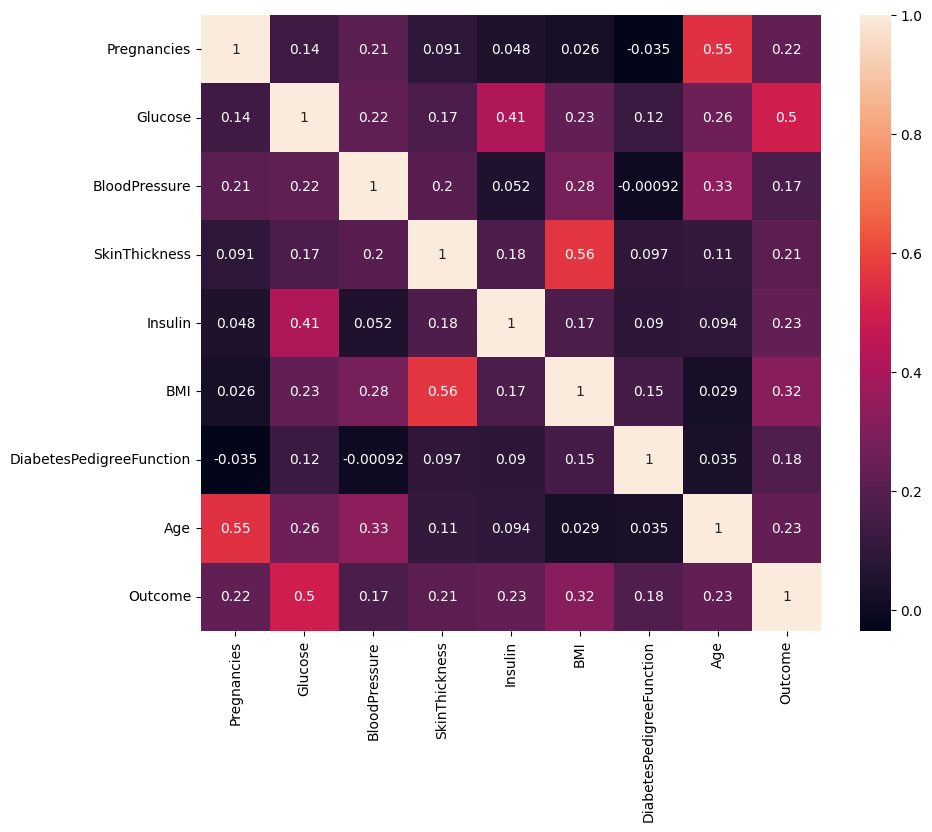

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(data=data.corr(),annot=True)

In [35]:
def group(x):
    if x <= 10:
        return x
    else:
        return ">10" 
df["preg_cat"] = df["Pregnancies"].apply(group)

In [36]:
l = []
m = []
for i,k in df["preg_cat"].value_counts().items():
    if i == ">10":
        pass
    else:
      l.append(i)
      m.append(k)
s = pd.Series(m,index=l).sort_index()
gr_ten = pd.Series(df[df["preg_cat"] == ">10"].shape[0],index=[">10"])
preg = pd.concat((s,gr_ten),axis=0)

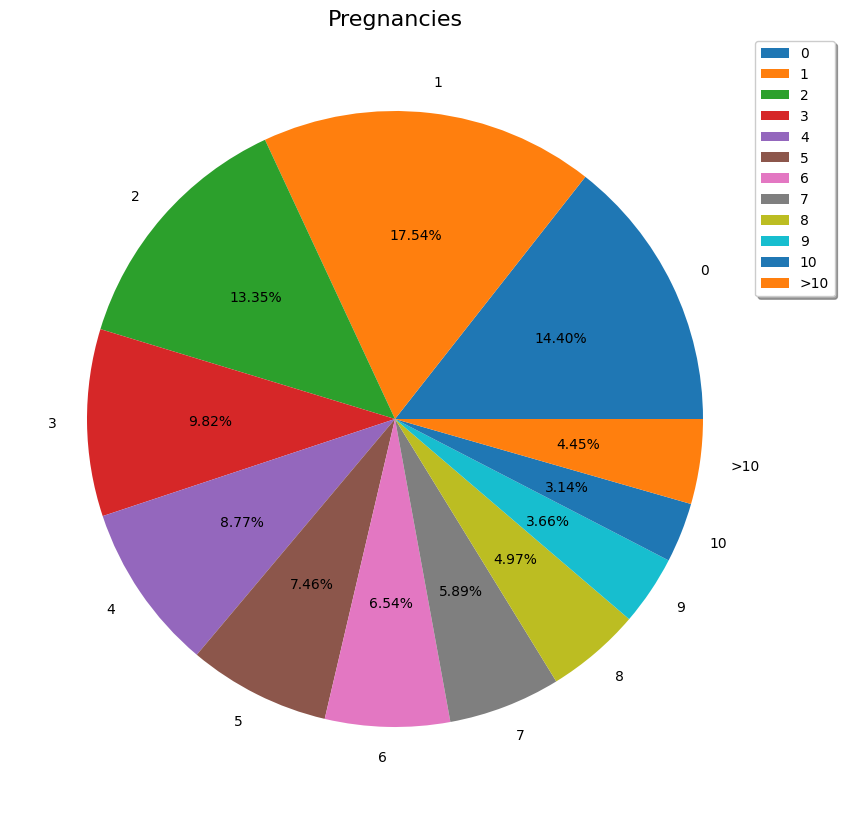

In [37]:
plt.figure(figsize=(16,10))
plt.title("Pregnancies",fontsize=16)
plt.pie(labels=preg.index,x=preg.values,autopct="%.2f%%")
plt.legend(shadow=True,bbox_to_anchor=(1.08,1))
plt.show()

In [38]:
from warnings import filterwarnings 
filterwarnings("ignore")

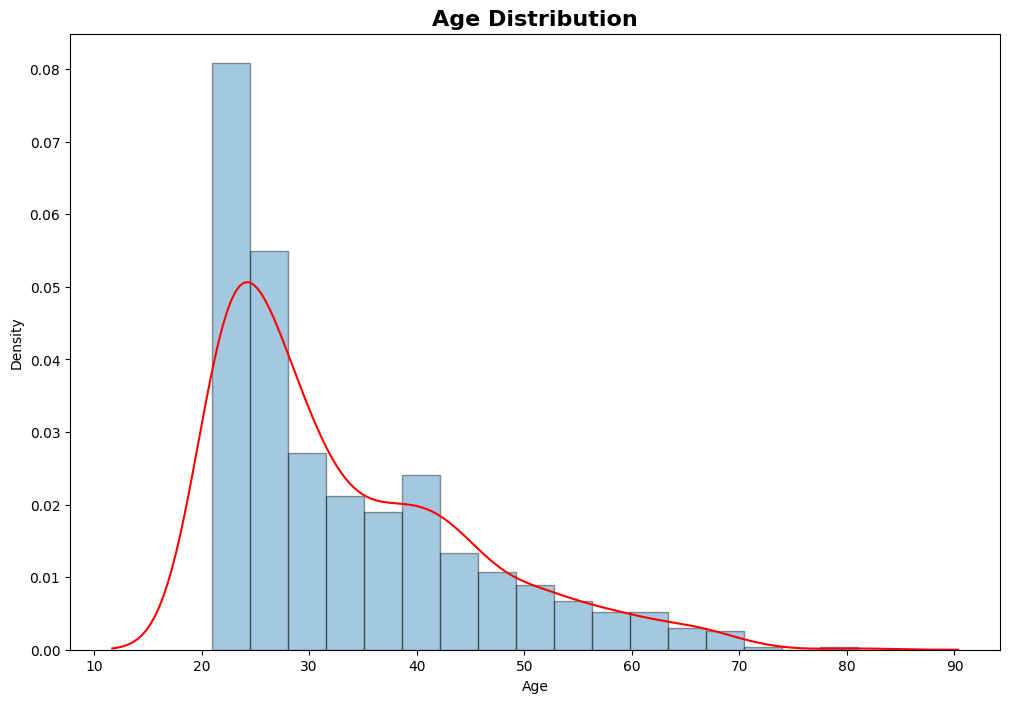

In [39]:
plt.figure(figsize=(12,8))
plt.title("Age Distribution",weight='bold',fontsize=16)
sns.distplot(x=df["Age"],kde_kws={"color":"red"},hist_kws={"edgecolor":"black"})
plt.xlabel("Age")
plt.show()

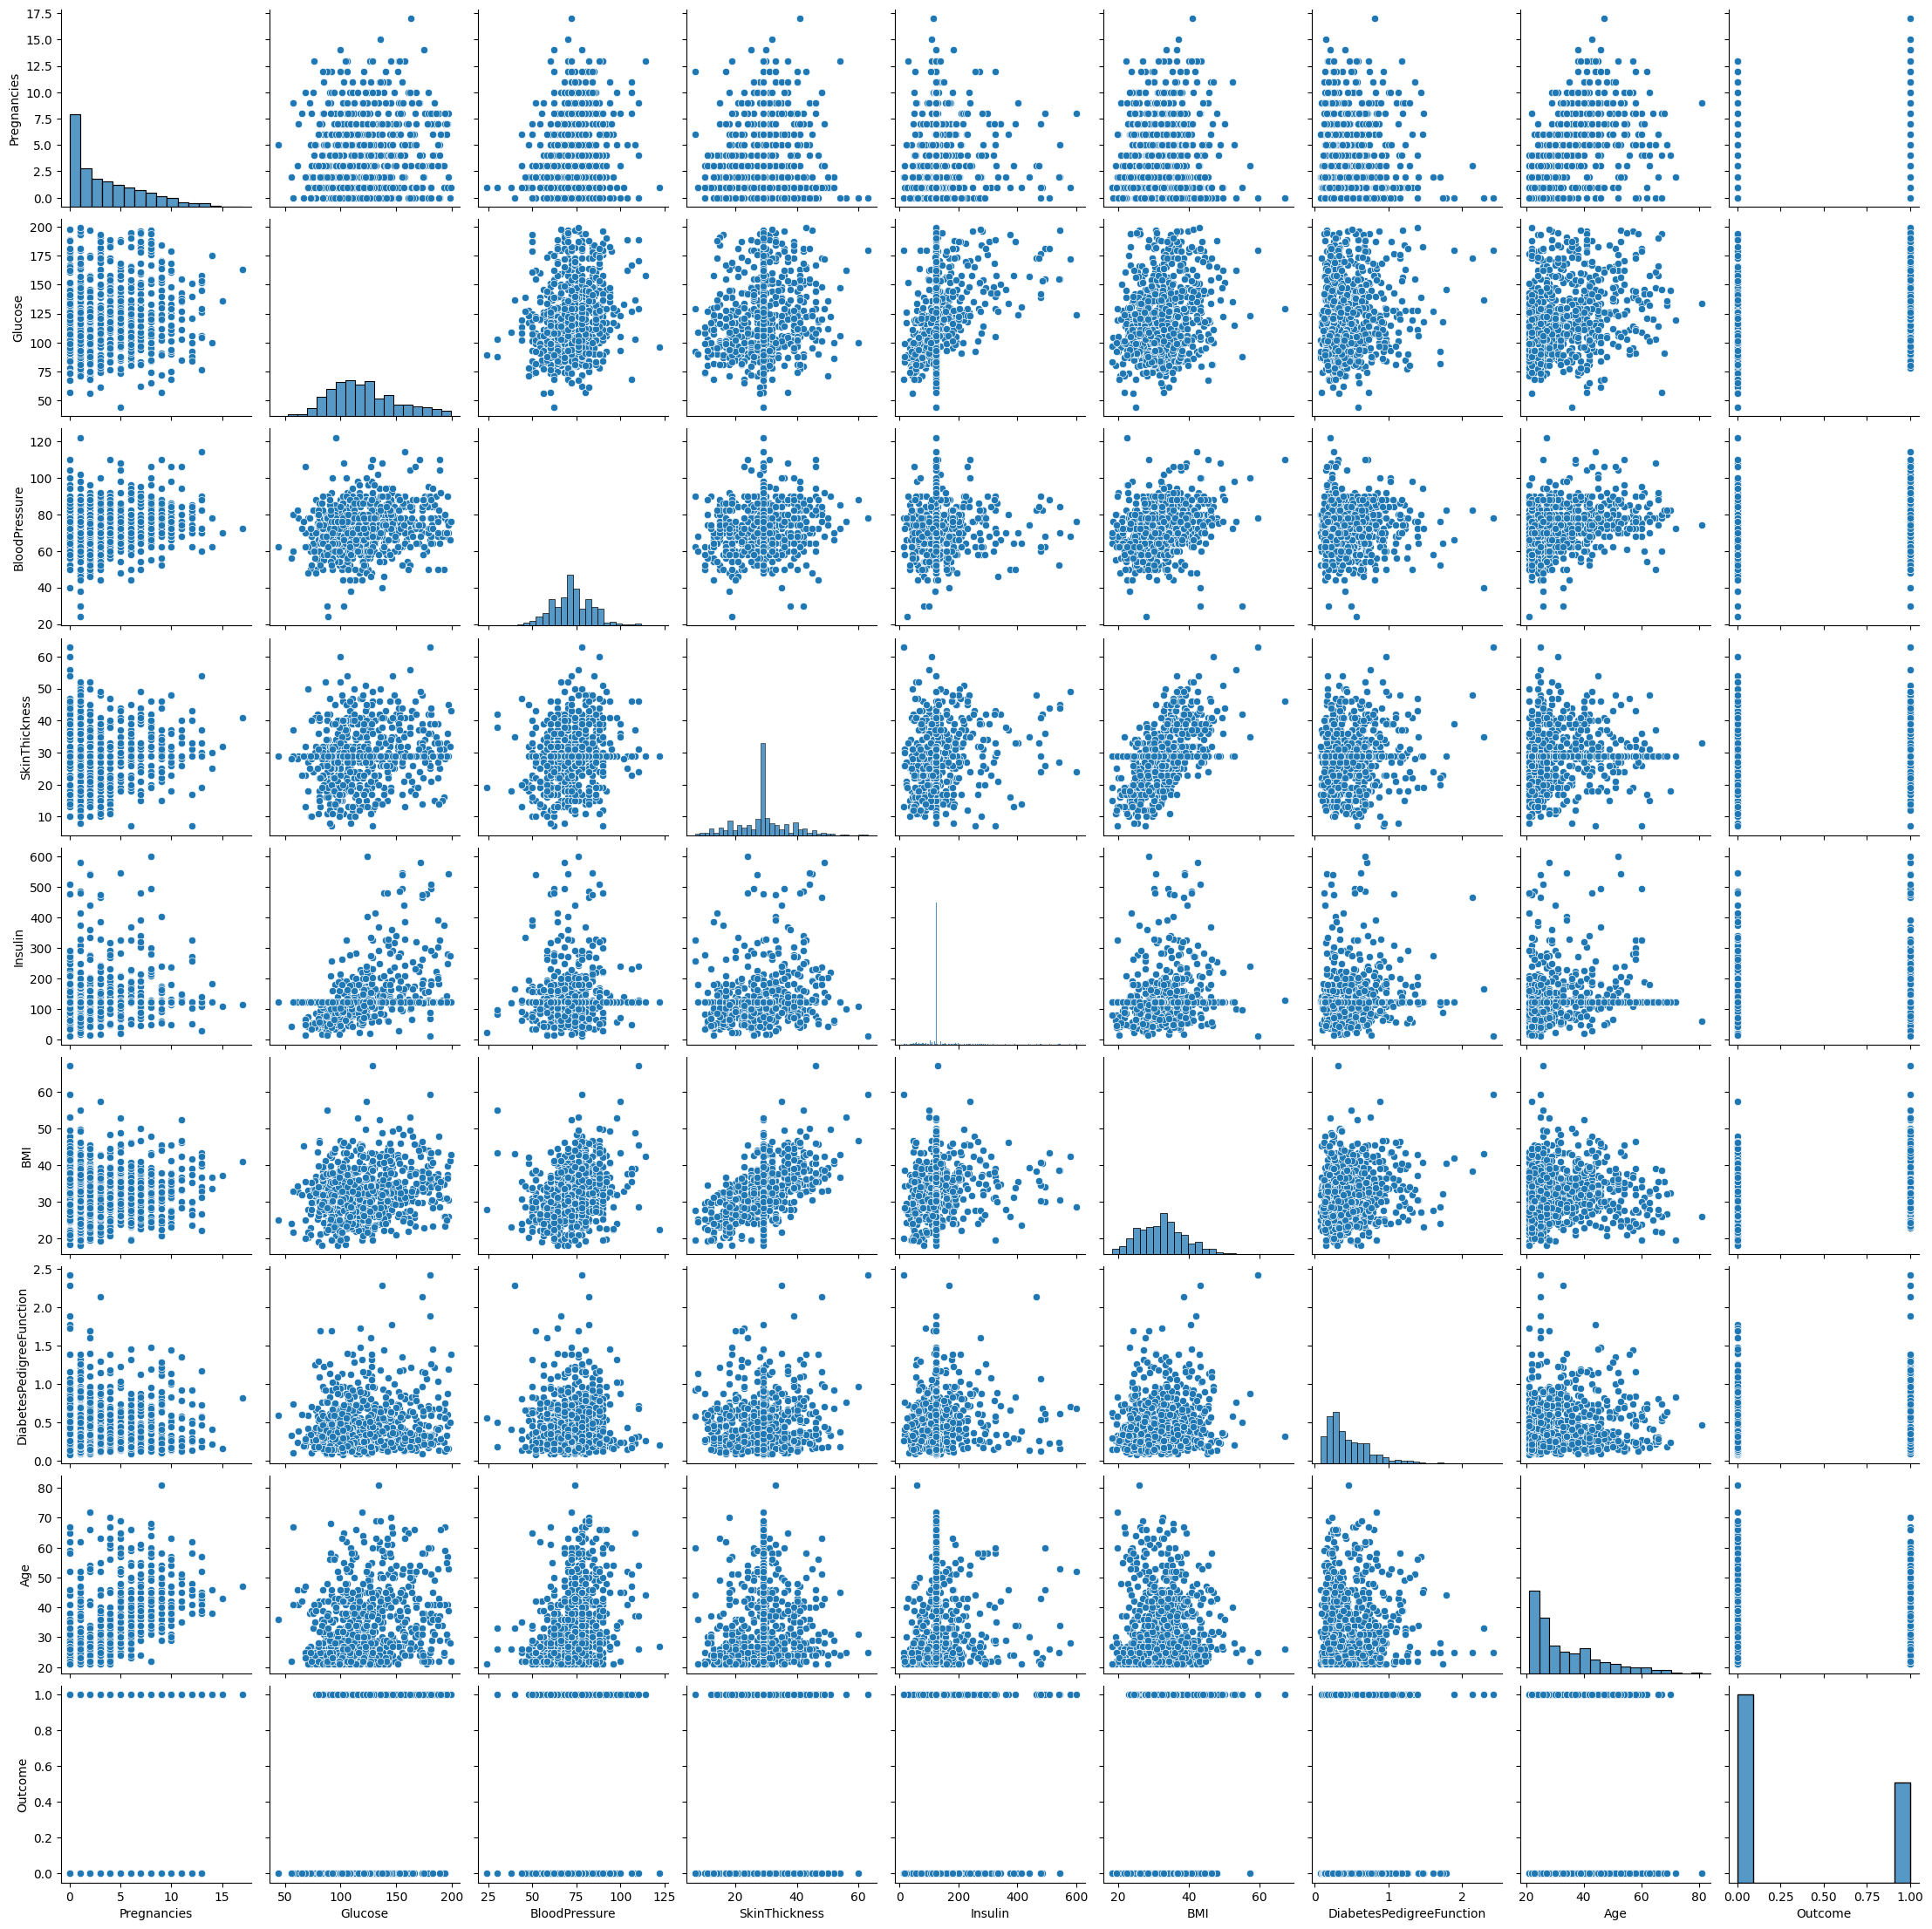

In [40]:
sns.pairplot(df)

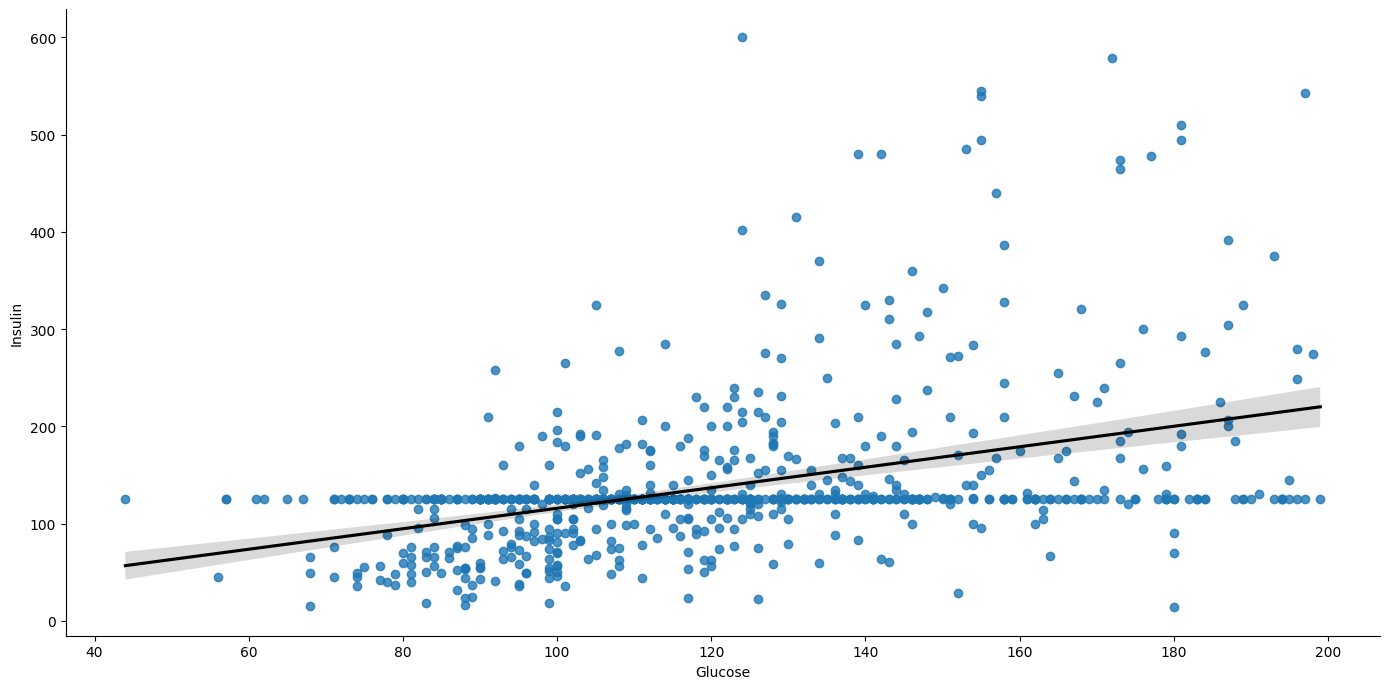

In [41]:
sns.lmplot(data=df[~(df["Insulin"] == 0)],x="Glucose",y="Insulin",height=7,aspect=2,line_kws={"color":"black"})

In [49]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'preg_cat'],
      dtype='object')

In [50]:
def grouper(x):
    if x < 18.5:
        return "underweight"
    elif x < 25:
        return "normal"
    elif x < 35:
        return "obese I"
    elif x < 40:
        return "obeses II"
    else:
        return "obese III"

In [52]:
df["BMI"] = df["BMI"].apply(grouper)

In [53]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,preg_cat
0,6,148.0,72.0,35.0,125.0,obese I,0.627,50,1,6
1,1,85.0,66.0,29.0,125.0,obese I,0.351,31,0,1
2,8,183.0,64.0,29.0,125.0,normal,0.672,32,1,8
3,1,89.0,66.0,23.0,94.0,obese I,0.167,21,0,1
4,0,137.0,40.0,35.0,168.0,obese III,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
759,10,101.0,76.0,48.0,180.0,obese I,0.171,63,0,10
760,2,122.0,70.0,27.0,125.0,obeses II,0.340,27,0,2
761,5,121.0,72.0,23.0,112.0,obese I,0.245,30,0,5
762,1,126.0,60.0,29.0,125.0,obese I,0.349,47,1,1


In [54]:
def Ins_grouper(x):
    if x >= 16 and x <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [56]:
df["Insulin"] = df["Insulin"].apply(Ins_grouper)

In [57]:
def Gluc_grouper(x):
    if x <= 70:
        return "Low"
    elif x > 70 and x < 100:
        return "Normal"
    elif x >= 100 and x <= 126:
        return "Overweight"
    else:
        return "Secret"

In [59]:
df["Glucose"] = df["Glucose"].apply(Gluc_grouper)

In [61]:
df.drop("preg_cat",axis=1,inplace=True)

In [62]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder,MinMaxScaler

In [63]:
sc = StandardScaler()

In [65]:
oe = OrdinalEncoder()

In [67]:
df[["BMI","Insulin","Glucose"]] = oe.fit_transform(df[["BMI","Insulin","Glucose"]])

In [81]:
scaled_data = sc.fit_transform(df.drop("Outcome",axis=1))

In [82]:
scaled_data = pd.DataFrame(scaled_data,columns=sc.get_feature_names_out())

In [83]:
scaled_data = pd.concat((scaled_data,df[["Outcome"]]),axis=1)

In [100]:
x_train,x_test,y_train,y_test =train_test_split(scaled_data.drop("Outcome",axis=1),scaled_data["Outcome"],test_size=0.2)

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
lg = LogisticRegression()

In [103]:
lg.fit(x_train,y_train)

LogisticRegression()

In [104]:
lg.score(x_train,y_train)

0.7479541734860884

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rf = RandomForestClassifier()

In [107]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [108]:
rf.score(x_train,y_train)

1.0

In [109]:
rf.score(x_test,y_test)

0.7843137254901961

In [110]:
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_data.drop("Outcome",axis=1),scaled_data["Outcome"],test_size=0.2,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    print(i, ":", rf.score(x_test,y_test))

1 : 0.7843137254901961
2 : 0.7516339869281046
3 : 0.7843137254901961
4 : 0.7320261437908496
5 : 0.7189542483660131
6 : 0.7320261437908496
7 : 0.6535947712418301
8 : 0.6928104575163399
9 : 0.6993464052287581
10 : 0.6862745098039216
11 : 0.7254901960784313
12 : 0.803921568627451
13 : 0.7777777777777778
14 : 0.6535947712418301
15 : 0.7450980392156863
16 : 0.7647058823529411
17 : 0.7843137254901961
18 : 0.7058823529411765
19 : 0.7516339869281046
20 : 0.7189542483660131
21 : 0.738562091503268
22 : 0.7320261437908496
23 : 0.738562091503268
24 : 0.7124183006535948
25 : 0.6666666666666666
26 : 0.6928104575163399
27 : 0.7254901960784313
28 : 0.7647058823529411
29 : 0.6666666666666666
30 : 0.6993464052287581
31 : 0.7647058823529411
32 : 0.7450980392156863
33 : 0.7908496732026143
34 : 0.7058823529411765
35 : 0.7581699346405228
36 : 0.7058823529411765
37 : 0.738562091503268
38 : 0.7124183006535948
39 : 0.8104575163398693
40 : 0.7516339869281046
41 : 0.7320261437908496
42 : 0.7516339869281046
43 : 

In [112]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data.drop("Outcome",axis=1),scaled_data["Outcome"],test_size=0.2,random_state=39)
rf = RandomForestClassifier()

In [113]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [114]:
rf.score(x_test,y_test)

0.803921568627451

In [115]:
rf.score(x_train,y_train)

1.0